In [1]:
import matplotlib.pyplot as plt
import numpy as np
import warnings
from rich import print

warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")

import lal

# import pycbc
from pycbc.waveform import (
    get_td_waveform,
    td_approximants,
    get_fd_waveform,
    fd_approximants,
)
from pycbc.types import TimeSeries
from pyseobnr.generate_waveform import GenerateWaveform, generate_modes_opt

lal.MSUN_SI != Msun
__name__ = gwsurrogate.new.spline_evaluation
__package__= gwsurrogate.new


In [2]:
# Input parameters
q = 5.3
chi_1 = 0.9
chi_2 = 0.3
omega_start = 0.0137  # This is the orbital frequency in geometric units with M=1
eccentricity = 0.4
rel_anomaly = 2.3

t, modes = generate_modes_opt(
    q,
    chi_1,
    chi_2,
    omega_start,
    eccentricity=eccentricity,
    rel_anomaly=rel_anomaly,
    approximant="SEOBNRv5EHM",
)
modes.keys()

dict_keys(['2,2', '2,1', '3,3', '3,2', '4,4', '4,3'])

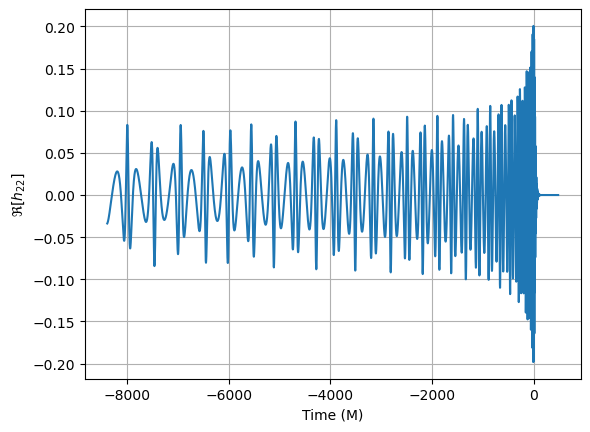

In [3]:
plt.figure()
plt.plot(t, modes["2,2"].real)
plt.xlabel("Time (M)")
plt.ylabel(r"$\Re[h_{22}]$")
plt.grid(True)

In [3]:
td_apx = [approx for approx in td_approximants() if approx.startswith("SEOBNRv5")]
fd_apx = [approx for approx in fd_approximants() if approx.startswith("SEOBNRv5")]

print(td_apx, fd_apx)

['SEOBNRv5_ROM_NRTidalv3', 'SEOBNRv5_ROM', 'SEOBNRv5EHM', 'SEOBNRv5E_tdtaper', 'SEOBNRv5HM', 'SEOBNRv5PHM']
[
    'SEOBNRv5_ROM',
    'SEOBNRv5HM_ROM',
    'SEOBNRv5_ROM_NRTidalv3',
    'SEOBNRv5_ROM_INTERP',
    'SEOBNRv5E',
    'SEOBNRv5EHM',
    'SEOBNRv5HM',
    'SEOBNRv5PHM',
    'SEOBNRv5PHM_INTERP'
]

In [4]:
m1 = 50.0
m2 = 30.0

distance = 1.0
inclination = np.pi / 3.0

phiRef = 0.0
s1x, s1y, s1z = 0.0, 0.0, 0.5
s2x, s2y, s2z = 0.0, 0.0, 0.1

dt = 1 / 2048.0
f_max = 1024.0
f_min = 0.0157 / ((m1 + m2) * np.pi * lal.MTSUN_SI)

params_dict = {
    "mass1": m1,
    "mass2": m2,
    "spin1x": s1x,
    "spin1y": s1y,
    "spin1z": s1z,
    "spin2x": s2x,
    "spin2y": s2y,
    "spin2z": s2z,
    "delta_t": dt,  # pyCBC parameter
    # pyCBC parameter:
    # if f_ref not specified, pyCBC will set it to "0"
    # and it will be as if it was not set and defaults to pyseobnr default
    "f_ref": 20,
    "eccentricity": 0.2,
    "rel_anomaly": 8,
    "f_lower": f_min,  # pyCBC parameter
    "coa_phase": phiRef,  # pyCBC parameter
    "distance": distance,
    "inclination": inclination,
    # pyCBC parameter: same as f_ref. Only used in get_fd_waveform
    # "f_final": f_max,
    "postadiabatic": False,  # pyseobnr specific parameter
}

In [5]:
hp, hc = get_td_waveform(approximant="SEOBNRv5E_tdtaper", **params_dict)

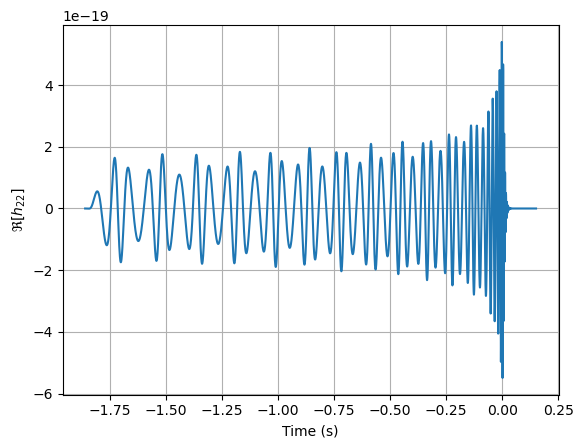

In [7]:
plt.figure()
plt.plot(hp.sample_times, hp)
plt.xlabel("Time (s)")
plt.ylabel(r"$\Re[h_{22}]$")
plt.grid(True)

In [6]:
hp, hc = get_td_waveform(approximant="SEOBNRv5EHM", **params_dict)

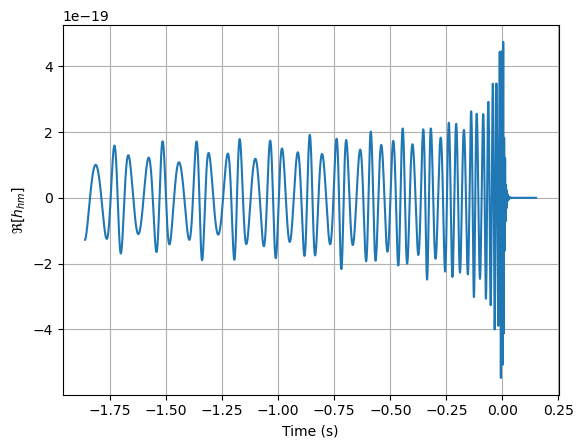

In [8]:
plt.figure()
plt.plot(hp.sample_times, hp)
plt.xlabel("Time (s)")
plt.ylabel(r"$\Re[h_{hm}]$")
plt.grid(True)

In [9]:
params_dict.update({"approximant": "SEOBNRv5EHM"})


In [10]:
waveform = GenerateWaveform(params_dict)
hp, hc = waveform.generate_td_polarizations()

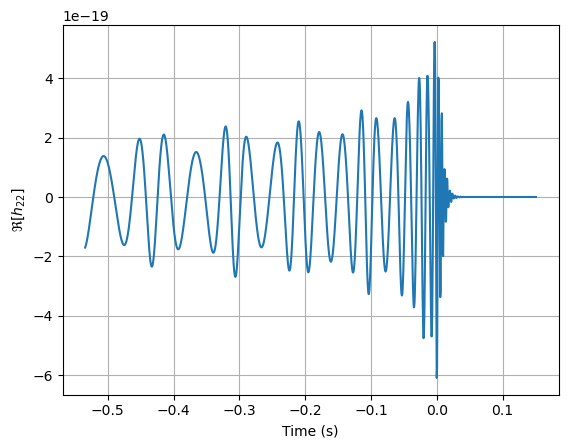

In [12]:
t = hp.deltaT * np.arange(hp.data.length) + hp.epoch
plt.figure()
plt.plot(t, hp.data.data[:])
plt.xlabel("Time (s)")
plt.ylabel(r"$\Re[h_{22}]$")
plt.grid(True)